In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [2]:
import pandas as pd
df = pd.read_csv("Fraud_check.csv")
df


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

Outliers

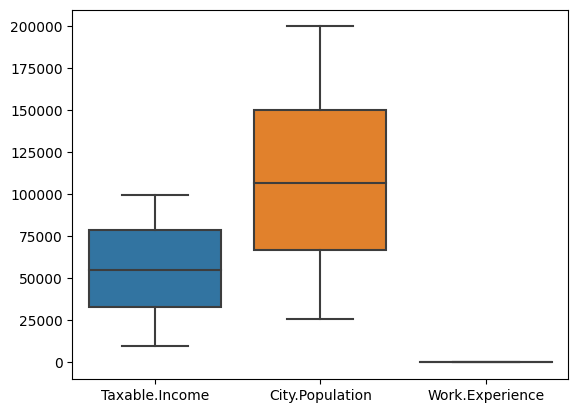

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
all = sns.boxplot(df)

array([[<Axes: title={'center': 'Taxable.Income'}>,
        <Axes: title={'center': 'City.Population'}>],
       [<Axes: title={'center': 'Work.Experience'}>, <Axes: >]],
      dtype=object)

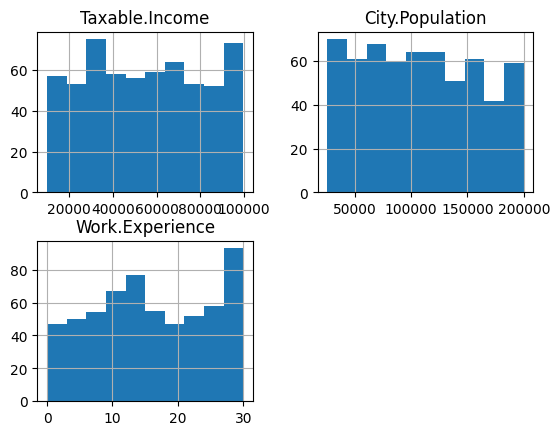

In [8]:
df.hist()

Create the target variable

In [9]:
df["Taxable.Income"] = df["Taxable.Income"].apply(lambda x: "Risky" if x <= 30000 else "Good")
df["Taxable.Income"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

EXPLORATORY DATA ANALYSIS

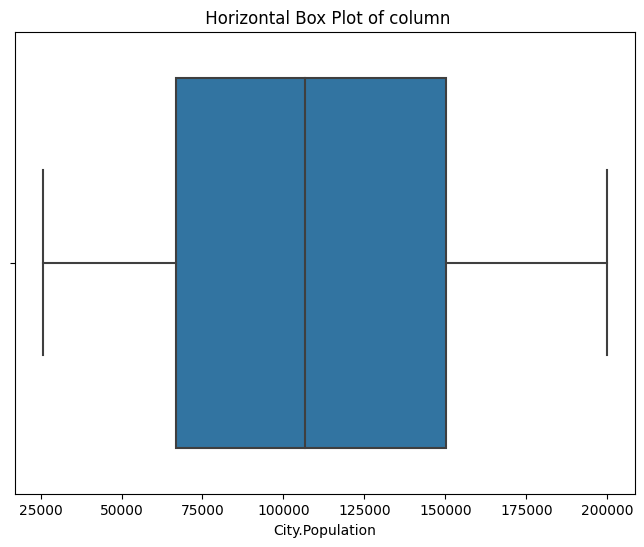

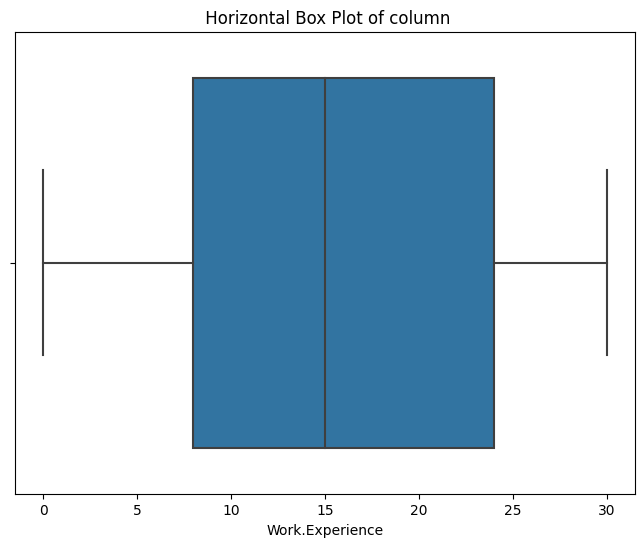

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
data = df.iloc[:,3:5]
for column in data:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(" Horizontal Box Plot of column")
    plt.show()

Removing the outliers

In [11]:
df1 = df.iloc[:,3:5]
df1

,City.Population,Work.Experience
0,50047,10
1,134075,18
2,160205,30
3,193264,15
4,27533,28
...,...,...
595,39492,7
596,55369,2
597,154058,0
598,180083,17


In [14]:
from scipy import stats

In [15]:
# Define a threshold for Z-score (e.g., Z-score greater than 3 or less than -3 indicates an outlier)
z_threshold = 3

In [16]:
# Calculate the Z-scores for each column in the DataFrame
import numpy as np
z_scores = np.abs(stats.zscore(df1))

In [17]:
# Create a mask to identify rows with outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)
outlier_mask

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [18]:
df = df[~outlier_mask]
df.shape

(600, 6)

In [19]:
df.skew()


<ipython-input-19-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


City.Population    0.125009
Work.Experience    0.018529
dtype: float64

In [21]:
df.kurt()


<ipython-input-21-8bd0d54cd88d>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


City.Population   -1.120154
Work.Experience   -1.167524
dtype: float64

In [22]:
df.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Undergrad"] = LE.fit_transform(df["Undergrad"])
df["Marital.Status"] = LE.fit_transform(df["Marital.Status"])
df["Urban"] = LE.fit_transform(df["Urban"])

In [24]:
X = df.drop("Taxable.Income", axis=1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [25]:
Y = df["Taxable.Income"]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y1=LE.fit_transform(df["Taxable.Income"])
Y1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

Data Partition

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y1,train_size = 0.75,random_state=123)


Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=7,
                        n_estimators=100,
                        max_samples=0.6,
                        max_features=0.7,
                        random_state=123)

In [29]:
RF.fit(X_train,Y_train)

RandomForestClassifier(max_depth=7, max_features=0.7, max_samples=0.6,
                       random_state=123)

In [30]:
Y_pred_train = RF.predict(X_train)
Y_pred_test = RF.predict(X_test)

Metrices

In [31]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [32]:
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",(ac1*100).round(3))

Training Accuracy Score: 82.444


In [33]:
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy Score:",(ac2*100).round(3))

Test Accuracy Score: 79.333


Confusion matrix and classification report

In [34]:
confusion = confusion_matrix(Y_test, Y_pred_test)
classification_rep = classification_report(Y_test, Y_pred_test)

In [35]:
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[119   1]
 [ 30   0]]


In [36]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88       120
           1       0.00      0.00      0.00        30

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.64      0.79      0.71       150



Grid Search CV

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 7, 9],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': [0.6, 0.7, 0.8]
    }

In [39]:
RF = RandomForestClassifier(random_state=123)

In [40]:
grid_search = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy')


In [41]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [5, 7, 9],
                         'max_features': [0.6, 0.7, 0.8],
                         'max_samples': [0.6, 0.7, 0.8],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [42]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 7, 'max_features': 0.8, 'max_samples': 0.7, 'n_estimators': 50}


In [43]:
print("Best Accuracy Score:", grid_search.best_score_)

Best Accuracy Score: 0.7955555555555556


In [44]:
best_RF = grid_search.best_estimator_

In [45]:
Y_pred_train = best_RF.predict(X_train)
Y_pred_test = best_RF.predict(X_test)

In [46]:
ac1 = accuracy_score(Y_train, Y_pred_train)
print("Training Accuracy Score:", (ac1*100).round(3))

Training Accuracy Score: 83.111


In [47]:
ac2 = accuracy_score(Y_test, Y_pred_test)
print("Test Accuracy Score:", (ac2*100).round(3))

Test Accuracy Score: 80.0


when applied Random Forest classifier , i got Training Accuracy Score: 83 ,Test Accuracy Score: 80%

Visualisation

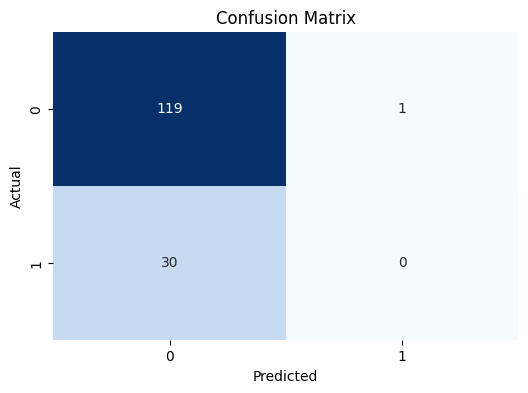

In [48]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()